# cats VS dogs Classification With Multiple Techniques

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras 
from keras import models
from keras import layers
from keras import optimizers
import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

## classification cats VS dogs using samples data and Regularization
just 1000 images 500 for cats and 500 for dogs and 400 for validation 200 for cats and 200 for dogs

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, kernel_regularizer='L2', activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# All images will be rescaled by 1./255
train_dir = '/content/drive/MyDrive/datasets/samples_cats-vs-dogs/samples-cats-dogs/train'
validation_dir = '/content/drive/MyDrive/datasets/samples_cats-vs-dogs/samples-cats-dogs/valid'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
50/50 [==============================] - 185s 3s/step - loss: 1.0483 - acc: 0.4940 - val_loss: 0.7377 - val_acc: 0.5000
Epoch 2/30
50/50 [==============================] - 4s 87ms/step - loss: 0.7130 - acc: 0.5130
Epoch 3/30
50/50 [==============================] - 4s 86ms/step - loss: 0.6982 - acc: 0.5000
Epoch 4/30
50/50 [==============================] - 4s 85ms/step - loss: 0.6958 - acc: 0.5000
Epoch 5/30
50/50 [==============================] - 4s 89ms/step - loss: 0.6939 - acc: 0.4770
Epoch 6/30
50/50 [==============================] - 4s 88ms/step - loss: 0.6940 - acc: 0.5000
Epoch 7/30
50/50 [==============================] - 4s 88ms/step - loss: 0.6931 - acc: 0.5000
Epoch 8/30
50/50 [==============================] - 4s 86ms/step - loss: 0.6946 - acc: 0.4990
Epoch 9/30
50/50 [==============================] - 4s 85ms/step - loss: 0.6962 - acc: 0.5110
Epoch 10/30
50/50 [==============================] - 4s 86ms/step - loss: 0.6989 - acc: 0.5390
Epoch 11/30
50/50 [===

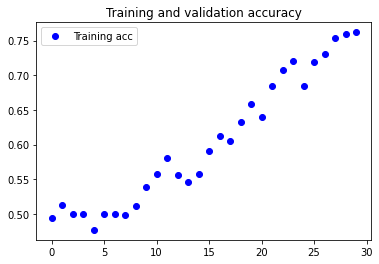

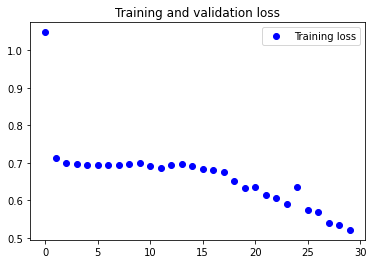

In [ ]:

acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


now we can see that the  accuracy almost 50% after 30 epochs and this because the low number of data so wee need to use all data 10000 images


## classification using all data and Regularizetion
the data is contain 5000 images for cats and 5000 for dogs to train the model .. and about 1800 images for validation for cats and dogs


In [ ]:
train_dir = '/content/drive/MyDrive/datasets/cats-vs-dogs/train'
validation_dir = '/content/drive/MyDrive/datasets/cats-vs-dogs/valid'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 1780 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=500,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
500/500 [==============================] - 1212s 2s/step - loss: 0.5906 - acc: 0.7228 - val_loss: 0.5601 - val_acc: 0.7590
Epoch 2/30
500/500 [==============================] - 123s 247ms/step - loss: 0.5368 - acc: 0.7524 - val_loss: 0.5637 - val_acc: 0.7310
Epoch 3/30
500/500 [==============================] - 80s 161ms/step - loss: 0.4929 - acc: 0.7758 - val_loss: 0.4923 - val_acc: 0.7870
Epoch 4/30
500/500 [==============================] - 61s 123ms/step - loss: 0.4546 - acc: 0.8004 - val_loss: 0.4651 - val_acc: 0.7940
Epoch 5/30
500/500 [==============================] - 52s 104ms/step - loss: 0.4271 - acc: 0.8188 - val_loss: 0.4027 - val_acc: 0.8320
Epoch 6/30
500/500 [==============================] - 49s 98ms/step - loss: 0.4126 - acc: 0.8314 - val_loss: 0.4623 - val_acc: 0.8080
Epoch 7/30
500/500 [==============================] - 48s 96ms/step - loss: 0.3721 - acc: 0.8486 - val_loss: 0.4031 - val_acc: 0.8320
Epoch 8/30
500/500 [==============================] - 47s

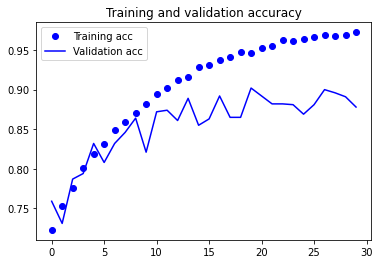

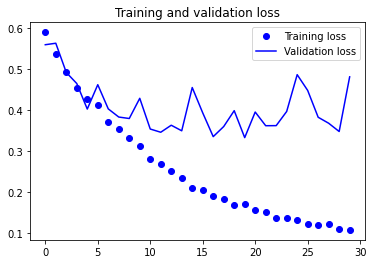

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


we can see that the accuracy reached 87% and also we can see that there is overfitting start to accur from almost epoch 17 so we will use data augmentation to increas the number of the data 

## calssification using Data Augmentation  (offline way) and Regularizetion above all data:

1) Offline Running the convolutional base over our dataset, recording its output to a Numpy array on disk, then using this data as input to a standalone densely-connected classifier similar to those you have seen in the first chapters of this book.

This solution is very fast (fast training because the expensive conv operation is not run every step of backprop, but slow in saving the data for sure) and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline.

However, for the exact same reason, this technique would not allow us to leverage data augmentation at all (because you already work at the features level). But you can think of another way to do data augmentation in the offline mode, which is to apply image transformations on the static data on disk, and then extract features for those. However, doing so, will limit the amount of augmented data, since it's done once at the beginning, versus doing augmentation at every step of the trainig, so getting new uncorrelated samples with every step. Note that: the offline data augmentation is not supported in Keras, since the ImageGenerator class is called within fit_generator, so must be online.

Advantages:

Fast training (no conv during training)
Disadvantages:

Augmentation not possible in Keras (not even offline augmentation)
Offline autmentation limits the amount of generated data unlike the online mode. There might be correlations as well.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, kernel_regularizer='L2', activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
train_dir = '/content/drive/MyDrive/datasets/cats-vs-dogs/train'
validation_dir = '/content/drive/MyDrive/datasets/samples_cats-vs-dogs/samples-cats-dogs/valid'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [ ]:
# train_cats_dir = '/content/drive/MyDrive/datasets/cats-vs-dogs/train/cats (1)'
# train_dogs_dir = '/content/drive/MyDrive/datasets/cats-vs-dogs/train/dogs'
# aug_cats_dir = '/content/drive/MyDrive/datasets/augmented/cats'
# aug_dogs_dir = '/content/drive/MyDrive/datasets/augmented/dogs'
# i = 0
# j = 0

# # i will use batch_size = 16 and the number of iterations will be 625 that to gain 10000 images from 5000 images

# for batch in train_datagen.flow_from_directory(train_cats_dir, batch_size=16 ,
#                                                target_size =(150, 150),
#                                                save_to_dir = aug_cats_dir ,
#                                                save_prefix ='aug',
#                                                save_format ='png'):
#   i=i+1
#   if i >= 625 :
#     break




In [ ]:
# for batch in train_datagen.flow_from_directory(train_dogs_dir ,
#                                                batch_size= 16 , 
#                                                target_size=(150 , 150),
#                                                save_to_dir= aug_dogs_dir , 
#                                                save_prefix = 'aug' , 
#                                                save_format = 'png') :
                                  
#   j = j+1
#   if j >=625:
#     break

In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')



validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 10000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
augm_dir = '/content/drive/MyDrive/datasets/augmented'
validation_dir = '/content/drive/MyDrive/datasets/cats-vs-dogs/valid'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        augm_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 19990 images belonging to 2 classes.
Found 1780 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=999,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
999/999 [==============================] - 2019s 2s/step - loss: 0.6997 - acc: 0.5648 - val_loss: 0.6419 - val_acc: 0.6470
Epoch 2/30
999/999 [==============================] - 67s 67ms/step - loss: 0.6494 - acc: 0.6316 - val_loss: 0.6004 - val_acc: 0.6930
Epoch 3/30
999/999 [==============================] - 67s 67ms/step - loss: 0.6109 - acc: 0.6786 - val_loss: 0.5669 - val_acc: 0.6970
Epoch 4/30
999/999 [==============================] - 68s 68ms/step - loss: 0.5786 - acc: 0.7110 - val_loss: 0.4938 - val_acc: 0.7640
Epoch 5/30
999/999 [==============================] - 68s 68ms/step - loss: 0.5559 - acc: 0.7275 - val_loss: 0.4958 - val_acc: 0.7750
Epoch 6/30
999/999 [==============================] - 67s 67ms/step - loss: 0.5351 - acc: 0.7458 - val_loss: 0.5135 - val_acc: 0.7520
Epoch 7/30
999/999 [==============================] - 67s 67ms/step - loss: 0.5149 - acc: 0.7611 - val_loss: 0.4419 - val_acc: 0.7920
Epoch 8/30
999/999 [==============================] - 66s 67ms

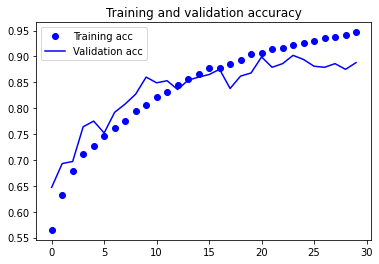

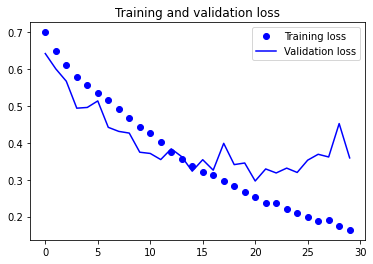

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


thanks for data augmentation overfitting is less than overfitting without data augmentation but still exisit because here we did offline data augmetation so we need to do online data augmentation

## calssification using Data Augmentation (online way) and Regularizetion :

2) Online Extending the model we have (conv_base) by adding Dense layers on top, and running the whole thing end-to-end on the input data.

This allows us to use data augmentation, because every input image is going through the convolutional base every time it is seen by the model.

However, for this same reason, this technique is far more expensive than the first one.

Advantages:

Online augmentation provides unlimited, and uncorrelated samples, with every training step.
Disadvantages:

Slow training

## save model, transfer it and then fine tuning

### Transfer Learning Withot Tuning

In [6]:
from keras.applications.vgg16 import VGG16


In [7]:

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 0s 0us/step


Now, let's review the second technique we mentioned for doing feature extraction, which is much slower and more expensive, but which allows us to leverage data augmentation during training: extending the conv_base model and running it end-to-end on the inputs.

Note that this technique is in fact so expensive that you should only attempt it if you have access to a GPU: it is absolutely intractable on CPU. If you cannot run your code on GPU, then the previous technique is the way to go.

Because models behave just like layers, you can add a model (like our conv_base) to a Sequential model just like you would add a layer.

In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [20]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, kernel_regularizer='L2', activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                524352    
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [22]:
print('This is the number of trainable layers '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable layers before freezing the conv base: 4


Before we compile and train our model, a very important thing to do is to freeze the convolutional base. "Freezing" a layer or set of layers means preventing their weights from getting updated during training.**Note that in order for these changes to take effect, we must first compile the model.

If you ever modify weight trainability after compilation, you should then re-compile the model, or these changes would be ignored.**

In [23]:
# freeaing
conv_base.trainable = False

In [24]:
print('This is the number of trainable layers '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable layers after freezing the conv base: 4


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                524352    
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


With this setup, only the weights from the two Dense layers that we added will be trained. That's a total of weight tensors: per layer

please take care of the parameter: process_input in ImageDataGenerator class. This one is important as it performs the necessary preprocessing needed for the image before giving it to the model you transfer from. Every pre-trained net typically provides the good pre-processing function.

In [26]:
from keras.applications.imagenet_utils import preprocess_input

train_dir = '/content/drive/MyDrive/datasets/cats-vs-dogs/train'
train_cats_dir = '/content/drive/MyDrive/datasets/cats-vs-dogs/train/cats (1)'
train_dogs_dir = '/content/drive/MyDrive/datasets/cats-vs-dogs/train/dogs'
aug_cats_dir = '/content/drive/MyDrive/datasets/augmented/cats'
aug_dogs_dir = '/content/drive/MyDrive/datasets/augmented/dogs'
augm_dir = '/content/drive/MyDrive/datasets/augmented'
validation_dir = '/content/drive/MyDrive/datasets/cats-vs-dogs/valid'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      preprocessing_function=preprocess_input,
      rotation_range=40, 
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        augm_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)  #rescale=1./255) 

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 19990 images belonging to 2 classes.
Found 1780 images belonging to 2 classes.


In [28]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=999,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('gdrive/My Drive/cats_and_dogs_small_3.h5')

### Fine tuning
 Fine-tuning consists in unfreezing a few of the top layers of a frozen model

Thus the steps for fine-tuning a network are as follow:


1.  Add your custom network on top of an already trained base network.

1. Freeze the base network.
3. Train the part you added.


4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part you added.


* We have already completed the first 3 steps when doing





In [ ]:
conv_base.summary()


We will fine-tune the last 3 convolutional layers, which means that all layers up until block4_pool should be frozen, and the layers block5_conv1, block5_conv2 and block5_conv3 should be trainable.

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Now we can start fine-tuning our network. We will do this with the RMSprop optimizer, using a very low learning: rate. The reason for using a low learning rate is that we want to limit the magnitude of the modifications we make to the representations of the 3 layers that we are fine-tuning. Updates that are too large may harm these representations.

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
model.save('gdrive/My Drive/cats_and_dogs_small_4.h5')


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can now finally evaluate this model on the test data:

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)